In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.layers import *

# 데이터 로드

In [183]:
data = pd.read_csv('../datasets/prep_total.csv', index_col= 0)
data = data[['검진 시 연령','체중', '허리둘레', 'BMI','수축기혈압', '이완기혈압','혈청크레아티닌']]
data.reset_index(inplace= True)
data.rename(columns={'고유값':'일련번호'}, inplace=True)
data.dropna(axis=0, inplace= True)

# 그룹화

In [184]:
grouped = data.groupby(['일련번호'])
grouped_df = {}
for key, group in grouped:
    grouped_df[key] = group

# 스케일링

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
minmaxscaler = MinMaxScaler()
# Groupby한 것을 잘라서 각각 스케일링하고 시퀀스작업도 각각해야함
X_list = []
Y_list = []
for key in grouped_df.keys():
    # 스케일링
    scaled_data = minmaxscaler.fit_transform(grouped_df[key][['검진 시 연령','체중', '허리둘레', 'BMI',
                                                              '수축기혈압', '이완기혈압','혈청크레아티닌']])
    
    # 시퀀스작업
    for i in range(0, len(scaled_data) - 2):
        _x = scaled_data[i : i + 2]
        _y = scaled_data[i + 2][4]
        X_list.append(_x)
        Y_list.append(_y)

In [187]:
sequence_X = np.array(X_list)
sequence_Y = np.array(Y_list)
print(sequence_X.shape)
print(sequence_Y.shape)

(855, 2, 7)
(855,)


# K_Fold_cross_validataion

In [188]:
from sklearn.model_selection import KFold

In [189]:
kf = KFold(n_splits=5)
kf.get_n_splits(sequence_X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


# Modeling

In [190]:
model = Sequential()
model.add(Conv1D(32, kernel_size=5, input_shape = (sequence_X.shape[1], sequence_X.shape[2]), padding= 'same', activation= 'relu'))      
model.add(MaxPool1D(padding='same', pool_size=2))
model.add(Dropout(0.025))
model.add(Conv1D(32, kernel_size=3, padding= 'same', activation= 'relu'))
model.add(MaxPool1D(padding='same', pool_size=1))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(1, activation = 'sigmoid'))
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 20)
model.compile(loss= 'mse', optimizer= 'adam')
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 2, 32)             1152      
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 1, 32)             3104      
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 32)              

# Learning

Train on 684 samples, validate on 171 samples
Epoch 1/500
684/684 [==============================] - 1s 2ms/sample - loss: 0.1040 - val_loss: 0.0965
Epoch 2/500
684/684 [==============================] - 0s 149us/sample - loss: 0.1041 - val_loss: 0.0967
Epoch 3/500
684/684 [==============================] - 0s 149us/sample - loss: 0.1037 - val_loss: 0.0967
Epoch 4/500
684/684 [==============================] - 0s 146us/sample - loss: 0.1040 - val_loss: 0.0966
Epoch 5/500
684/684 [==============================] - 0s 150us/sample - loss: 0.1035 - val_loss: 0.0965
Epoch 6/500
684/684 [==============================] - 0s 146us/sample - loss: 0.1033 - val_loss: 0.0960
Epoch 7/500
684/684 [==============================] - 0s 141us/sample - loss: 0.1034 - val_loss: 0.0963
Epoch 8/500
684/684 [==============================] - 0s 146us/sample - loss: 0.1039 - val_loss: 0.0956
Epoch 9/500
684/684 [==============================] - 0s 143us/sample - loss: 0.1024 - val_loss: 0.0964
Epoch 10/50

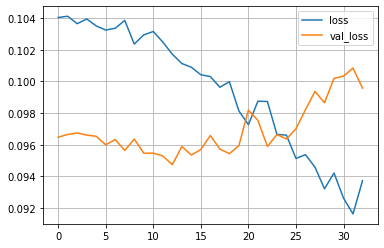

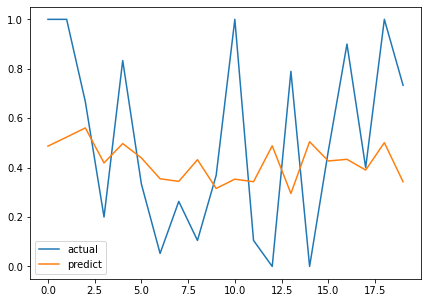

Train on 684 samples, validate on 171 samples
Epoch 1/500
684/684 [==============================] - 0s 162us/sample - loss: 0.0949 - val_loss: 0.0924
Epoch 2/500
684/684 [==============================] - 0s 150us/sample - loss: 0.0938 - val_loss: 0.0937
Epoch 3/500
684/684 [==============================] - 0s 152us/sample - loss: 0.0920 - val_loss: 0.0940
Epoch 4/500
684/684 [==============================] - 0s 147us/sample - loss: 0.0912 - val_loss: 0.0950
Epoch 5/500
684/684 [==============================] - 0s 166us/sample - loss: 0.0913 - val_loss: 0.0960
Epoch 6/500
684/684 [==============================] - 0s 140us/sample - loss: 0.0903 - val_loss: 0.0959
Epoch 7/500
684/684 [==============================] - 0s 146us/sample - loss: 0.0910 - val_loss: 0.0975
Epoch 8/500
684/684 [==============================] - 0s 143us/sample - loss: 0.0875 - val_loss: 0.0982
Epoch 9/500
684/684 [==============================] - 0s 141us/sample - loss: 0.0884 - val_loss: 0.0981
Epoch 10/

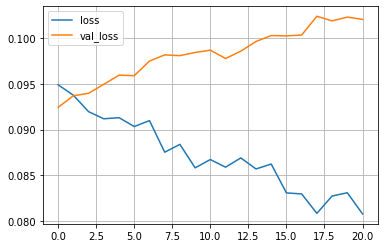

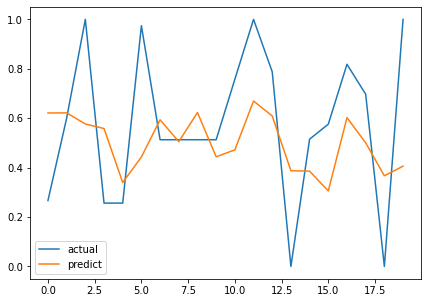

Train on 684 samples, validate on 171 samples
Epoch 1/500
684/684 [==============================] - 0s 165us/sample - loss: 0.0861 - val_loss: 0.0857
Epoch 2/500
684/684 [==============================] - 0s 146us/sample - loss: 0.0853 - val_loss: 0.0883
Epoch 3/500
684/684 [==============================] - 0s 152us/sample - loss: 0.0842 - val_loss: 0.0861
Epoch 4/500
684/684 [==============================] - 0s 144us/sample - loss: 0.0824 - val_loss: 0.0892
Epoch 5/500
684/684 [==============================] - 0s 147us/sample - loss: 0.0846 - val_loss: 0.0929
Epoch 6/500
684/684 [==============================] - 0s 147us/sample - loss: 0.0802 - val_loss: 0.0904
Epoch 7/500
684/684 [==============================] - 0s 152us/sample - loss: 0.0800 - val_loss: 0.0979
Epoch 8/500
684/684 [==============================] - 0s 146us/sample - loss: 0.0805 - val_loss: 0.0958
Epoch 9/500
684/684 [==============================] - 0s 149us/sample - loss: 0.0787 - val_loss: 0.0990
Epoch 10/

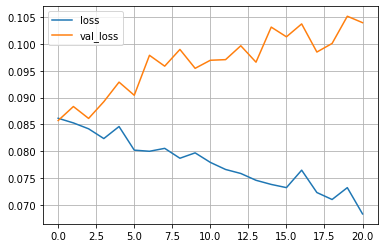

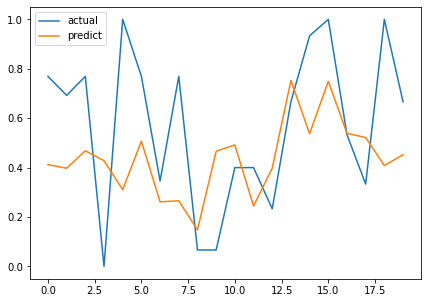

Train on 684 samples, validate on 171 samples
Epoch 1/500
684/684 [==============================] - 0s 166us/sample - loss: 0.0783 - val_loss: 0.0810
Epoch 2/500
684/684 [==============================] - 0s 147us/sample - loss: 0.0749 - val_loss: 0.0737
Epoch 3/500
684/684 [==============================] - 0s 150us/sample - loss: 0.0754 - val_loss: 0.0797
Epoch 4/500
684/684 [==============================] - 0s 150us/sample - loss: 0.0738 - val_loss: 0.0780
Epoch 5/500
684/684 [==============================] - 0s 144us/sample - loss: 0.0732 - val_loss: 0.0785
Epoch 6/500
684/684 [==============================] - 0s 141us/sample - loss: 0.0728 - val_loss: 0.0815
Epoch 7/500
684/684 [==============================] - 0s 155us/sample - loss: 0.0720 - val_loss: 0.0838
Epoch 8/500
684/684 [==============================] - 0s 146us/sample - loss: 0.0723 - val_loss: 0.0840
Epoch 9/500
684/684 [==============================] - 0s 146us/sample - loss: 0.0700 - val_loss: 0.0872
Epoch 10/

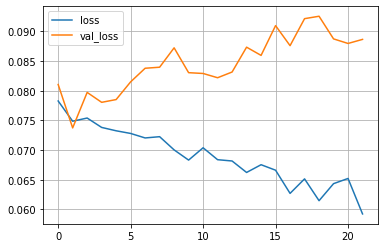

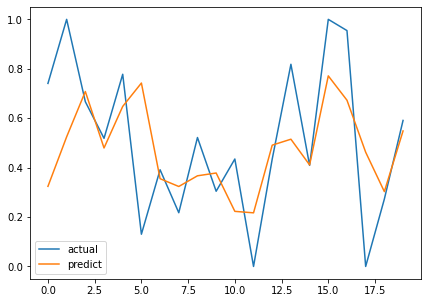

Train on 684 samples, validate on 171 samples
Epoch 1/500
684/684 [==============================] - 0s 185us/sample - loss: 0.0715 - val_loss: 0.0531
Epoch 2/500
684/684 [==============================] - 0s 147us/sample - loss: 0.0707 - val_loss: 0.0568
Epoch 3/500
684/684 [==============================] - 0s 140us/sample - loss: 0.0693 - val_loss: 0.0563
Epoch 4/500
684/684 [==============================] - 0s 140us/sample - loss: 0.0681 - val_loss: 0.0617
Epoch 5/500
684/684 [==============================] - 0s 130us/sample - loss: 0.0693 - val_loss: 0.0615
Epoch 6/500
684/684 [==============================] - 0s 134us/sample - loss: 0.0671 - val_loss: 0.0653
Epoch 7/500
684/684 [==============================] - 0s 134us/sample - loss: 0.0665 - val_loss: 0.0654
Epoch 8/500
684/684 [==============================] - 0s 150us/sample - loss: 0.0670 - val_loss: 0.0686
Epoch 9/500
684/684 [==============================] - 0s 147us/sample - loss: 0.0682 - val_loss: 0.0764
Epoch 10/

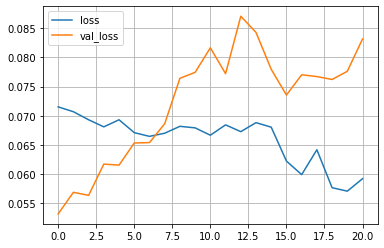

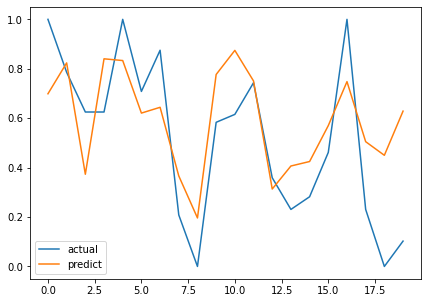

In [191]:
for train_index, test_index in kf.split(sequence_X):
    X_train, X_test = sequence_X[train_index], sequence_X[test_index]
    Y_train, Y_test = sequence_Y[train_index], sequence_Y[test_index]

    fit_hist = model.fit(X_train, Y_train, epochs = 500, validation_data= (X_test, Y_test), shuffle= False, callbacks= [early_stop])

    plt.plot(fit_hist.history['loss'], label= 'loss')
    plt.plot(fit_hist.history['val_loss'], label= 'val_loss')
    plt.legend()
    plt.grid()
    plt.show()

    predict = model.predict(X_test)
    fig = plt.figure(figsize = (7,5))
    plt.plot(Y_test[-20:], label= 'actual')
    plt.plot(predict[-20:], label= 'predict')
    plt.legend()
    plt.show()

In [192]:
fig.savefig('../datasets/bp_graph/age_weight_waist_bmi_bp_creatine/2개씩.png')